## 訓練資料

In [1]:
# gpu setting
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [5]:
from tensorflow.keras.utils import to_categorical

## 資料準備
* imageX : (.jpg), 讀取方式 : mpimg.imread()
* LabelY : (int), 讀取方式 : pd.read_csv()

In [6]:
# Labels Y
data = pd.read_csv('./certify_processed/labels.csv', encoding = 'big5')
Y = data.iloc[0, 1:]

# image X
import matplotlib.image as mpimg
img_dir = './certify_processed/images/'
imgs = np.empty([3000, 12, 12])  # 存放圖片

for img_index in range(3000):
    # 讀取圖檔
    img = mpimg.imread(img_dir+"crop%04d.jpg"%(img_index))
    imgs[img_index]=img
X = imgs

## train_test_split

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y[:3000],
                                                    test_size = 0.2,
                                                    random_state = 0)

## 標準化
* /255 (因為mping.imread讀進 0~255)

In [9]:
# Normalize
x_train /= 255.
x_test /= 255.

In [66]:
y_train.shape, y_test.shape

((2400,), (600,))

In [67]:
x_train.shape, x_test.shape

((2400, 12, 12), (600, 12, 12))

## Preprocessing
* 變成一維陣列 (12x12=144)
* 分成 10 類

In [70]:
x_train = x_train.reshape(x_train.shape[0], 144)
x_test = x_test.reshape(x_test.shape[0], 144)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [71]:
x_train.shape, x_test.shape

((2400, 144), (600, 144))

## 模型建置
* 3 層 200 節點, 一層 10 sorftmax

In [72]:
model = Sequential([Dense(200, input_dim=144),
                    Activation('relu'),
                    Dense(200),
                    Activation('relu'),
                    Dense(200),
                    Activation('relu'),
                    Dense(10),
                    Activation('softmax'),
                    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               29000     
_________________________________________________________________
activation (Activation)      (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

In [73]:
# fitting
model.compile(loss='mse', optimizer=SGD(lr=0.5), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=10)

Train on 2400 samples
Epoch 1/10
2400/2400 [==============================] - 1s 234us/sample - loss: 0.0413 - accuracy: 0.7854
Epoch 2/10
2400/2400 [==============================] - 0s 109us/sample - loss: 0.0021 - accuracy: 0.9987
Epoch 3/10
2400/2400 [==============================] - 0s 140us/sample - loss: 0.0010 - accuracy: 0.9987
Epoch 4/10
2400/2400 [==============================] - 0s 113us/sample - loss: 7.6811e-04 - accuracy: 0.9987
Epoch 5/10
2400/2400 [==============================] - 0s 111us/sample - loss: 6.3925e-04 - accuracy: 0.9987
Epoch 6/10
2400/2400 [==============================] - 0s 111us/sample - loss: 5.6752e-04 - accuracy: 0.9987
Epoch 7/10
2400/2400 [==============================] - 0s 119us/sample - loss: 5.1391e-04 - accuracy: 0.9987
Epoch 8/10
2400/2400 [==============================] - 0s 127us/sample - loss: 4.7638e-04 - accuracy: 0.9987
Epoch 9/10
2400/2400 [==============================] - 0s 121us/sample - loss: 4.4287e-04 - accuracy: 0.9987


In [74]:
# testing data
model.evaluate(x_test, y_test)

600/600 [==============================] - 0s 123us/sample - loss: 2.0746e-04 - accuracy: 1.0000


[0.00020746123077818387, 1.0]

In [94]:
# save parameter of model
model_json = model.to_json()
open('Certiy_Recognize.json', 'w').write(model_json)
model.save('Certiy_Recognize.h5')

## 剩下 1000 筆
* unknown_img : (.jpg) 讀取方式 : mpimg.imread
* reshape : 需要轉換 144
* 亂數看結果

In [88]:
unknown_imgs = np.empty([1000, 12, 12])

for img_index in range(3000, 4000, 1):
    # 讀取圖檔
    img = mpimg.imread(img_dir+"crop%04d.jpg"%(img_index))
    unknown_imgs[img_index-3000]=img

unknown_imgs = unknown_imgs.reshape(1000, 144)

In [89]:
predict = model.predict_classes(unknown_imgs)

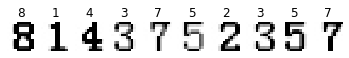

In [93]:
column_len = 10
pick = np.random.randint(0,1000, column_len)

for i in range(column_len):
    plt.subplot(1,column_len,i+1)
    plt.imshow(unknown_imgs[pick[i]].reshape(12, 12), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")